In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv("flight_data.csv")

In [3]:
df.info()
# Columns having NULLs: dep_time, dep_delay, arr_time, arr_delay, tailnum, air_time, 
# These variables require cleanup

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


In [13]:
# Find count of missing values for each column
df.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [9]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [41]:
# Only dep_delay,arr_delay,air_time,distance are Numerical. 
# Rest are categorical, hence mean etc statistics won't matter for them.
df.loc[:, ["dep_delay","arr_delay","air_time","distance","flight"] ].describe()

,dep_delay,arr_delay,air_time,distance,flight
count,328521.000000,328063.000000,328063.000000,336776.000000,336776.000000
mean,12.639070,7.254738,151.029805,1039.912604,1971.923620
std,40.210061,45.444558,93.966221,733.233033,1632.471938
min,-43.000000,-322.000000,20.000000,17.000000,1.000000
25%,-5.000000,-17.000000,82.000000,502.000000,553.000000
50%,-2.000000,-5.000000,130.000000,872.000000,1496.000000
75%,11.000000,14.000000,192.000000,1389.000000,3465.000000
max,1301.000000,1272.000000,1165.000000,4983.000000,8500.000000


In [14]:
df["time_hour"].value_counts().shape
df["time_hour"].value_counts()
# Scheduled departure Slot: Date & Hour
# Looks like Maximum flights are scheduled in 8 O'clock slot. 
#       But that may not be true for 1st half of year. Need more analysis. 

(6936,)

13-09-2013 08:00    94
20-09-2013 08:00    94
16-09-2013 08:00    93
09-09-2013 08:00    93
23-09-2013 08:00    93
11-10-2013 08:00    92
19-09-2013 08:00    92
09-10-2013 08:00    91
17-09-2013 08:00    91
24-09-2013 08:00    91
18-09-2013 08:00    91
01-10-2013 08:00    91
16-10-2013 08:00    91
23-10-2013 08:00    91
10-09-2013 08:00    91
12-09-2013 08:00    91
22-10-2013 08:00    90
04-10-2013 08:00    90
15-10-2013 08:00    90
07-10-2013 08:00    90
08-10-2013 08:00    90
21-10-2013 08:00    90
24-10-2013 08:00    90
03-10-2013 08:00    90
14-10-2013 08:00    90
10-10-2013 08:00    90
25-10-2013 08:00    90
18-10-2013 08:00    90
17-10-2013 08:00    90
01-11-2013 08:00    89
                    ..
21-09-2013 23:00     1
19-10-2013 23:00     1
10-09-2013 23:00     1
26-09-2013 23:00     1
18-09-2013 23:00     1
13-10-2013 23:00     1
24-10-2013 23:00     1
09-09-2013 23:00     1
05-10-2013 23:00     1
27-07-2013 01:00     1
29-09-2013 23:00     1
20-10-2013 23:00     1
14-09-2013 

# Data Clean-Up

## variables require cleanup: dep_time, dep_delay, arr_time, arr_delay, tailnum, air_time, 

## Phase-1:
1. dep_time & dep_delay  : Availability of Any one (clubbed with sched_dep_time) can compute the other
2. arr_time & arr_delay  : Availability of Any one (clubbed with sched_arr_time) can compute the other
3. air_time, dep_time & arr_time  : Any two can compute third 
4. tailnum   : TBD

#### (1) dep_time & dep_delay : Availability of Any one (clubbed with sched_dep_time) can compute the other

 Confirm whether rows have value for at least one variable (out of dep_time & dep_delay)

In [7]:
np.sum( df["dep_time"].isnull() & df["dep_delay"].notnull() )      # 0: So dep_time cannot be filled using dep_delay
np.sum( df["dep_time"].notnull() & df["dep_delay"].isnull() )      # 0: So dep_delay cannot be filled using dep_time

# So "dep_time" & "dep_delay" both are missing simultaneously

0

0

#### (2) arr_time & arr_delay : Availability of Any one (clubbed with sched_arr_time) can compute the other

Confirm whether rows have value for at least one variable (out of arr_time & arr_delay)

In [9]:
np.sum( df["arr_time"].isnull() & df["arr_delay"].notnull() )      #   0: So arr_time cannot be filled using arr_delay
np.sum( df["arr_time"].notnull() & df["arr_delay"].isnull() )      # 717: So 717 arr_delay can be filled using arr_time

0

717

In [15]:
def HHMM_to_Minutes(HHMM):
    return (HHMM//100) * 60 + (HHMM%100)

def HHMM_diff_inMinutes(x1 , x2, ref):
    """ Perform x1-x2    (both are in HHMM format)
        But what-if date changes? (x1-x2) will be big +ve or big -ve.
        Compare (x1-x2) with "ref" to check whether big is really invalid. If so, do correction."""
    x_diff = HHMM_to_Minutes(x1) - HHMM_to_Minutes(x2)
    # If date changes, this will become large -ve or +ve which is not correct. Correct below
    plt.figure(figsize=(15,3))
    plt.subplot(1,2,1)
    abs(x_diff - ref).hist()    # 23 hrs of deviation found, which is anomaly & indicative of date change
    plt.title("Initial Deviations w.r.t. Reference (absolute)")
    plt.xlabel("Absolute Deviation BINS")
    anomaly_neg = (  (x_diff - ref) < -600  )
    x_diff[anomaly_neg] += 1440

    anomaly_postiv = (    (x_diff - ref) > 600  )
    x_diff[anomaly_postiv] -= 1440

    x_diff.describe()
    plt.subplot(1,2,2)
    abs(x_diff - ref).hist()
    plt.title("Adjusted Deviations w.r.t. Reference (absolute)")
    return x_diff


count    328063.000000
mean          7.254738
std          45.444558
min        -322.000000
25%         -17.000000
50%          -5.000000
75%          14.000000
max        1272.000000
dtype: float64

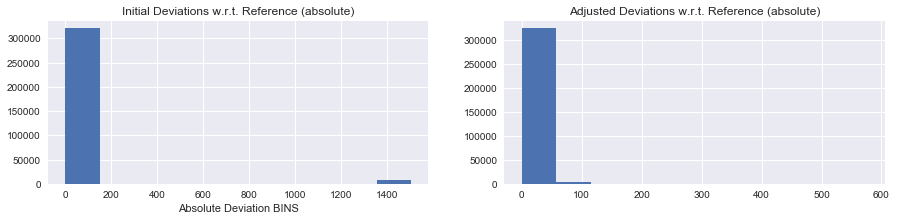

In [16]:
arr_delay_toFILL = HHMM_diff_inMinutes(df.arr_time, df.sched_arr_time, ref=df["dep_delay"])
arr_delay_toFILL.describe()

In [17]:
# Let's fill 717 arr_delay using arr_time
only_arr_time = df.arr_time.notnull() & df.arr_delay.isnull()
df.loc[only_arr_time, "arr_delay"] = arr_delay_toFILL[only_arr_time]

#### (3) air_time, dep_time & arr_time : Any two can compute third



Find rows having any two out of ( arr_time, dep_time, air_time)

In [51]:
np.sum( df["arr_time"].isnull() & df["dep_time"].notnull() & df["air_time"].notnull() )  # 0: So arr_time cannot be filled
np.sum( df["arr_time"].notnull() & df["dep_time"].isnull() & df["air_time"].notnull() )  # 0: So dep_time cannot be filled
np.sum( df["arr_time"].notnull() & df["dep_time"].notnull() & df["air_time"].isnull() )  # 717: So air_time can be filled

0

0

717

In [18]:
air_time_toFILL = HHMM_to_Minutes(df.arr_time) - HHMM_to_Minutes(df.dep_time)
air_time_toFILL.describe()    # -ve found
air_time_toFILL[ air_time_toFILL < 0 ] += 1440
#air_time_toFILL.describe()    # -ve is removed now

count    328063.000000
mean         91.004356
std         253.830350
min       -1401.000000
25%          91.000000
50%         133.000000
75%         172.000000
max         690.000000
dtype: float64

In [19]:
# Fill 717 air_time missing records
both_vars = df.arr_time.notnull() & df.dep_time.notnull() & df.air_time.isnull()
df.loc[both_vars, "air_time"] = air_time_toFILL[both_vars]

df.air_time.describe()

count    328063.000000
mean        151.029805
std          93.966221
min          20.000000
25%          82.000000
50%         130.000000
75%         192.000000
max        1165.000000
Name: air_time, dtype: float64

Note that, in Phase-1, we have just filled 717 + 717 missing cells. Not enough.

## Phase-2: Use estimates to fill missing data

### Create Pivot & Heatmap to understand distribution of dep_delay across "Carrier" vs. "Months"


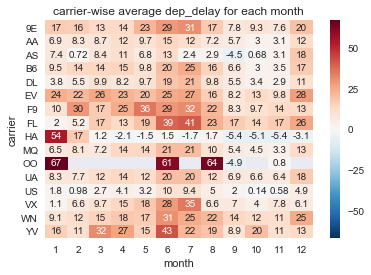

In [21]:
df_pvtble = df.pivot_table(index="carrier", columns="month", values="dep_delay") 
sns.heatmap(df_pvtble, annot=True)       #carrier-wise average dep_delay for each month
plt.title("carrier-wise average dep_delay for each month");


#### Use above derived avg delays to fill the missing values

In [22]:
na_idx = df.dep_delay.isnull()
fill_NA = np.diag( df_pvtble.loc[df.carrier[na_idx], df.month[na_idx]] )
df.loc[na_idx, "dep_delay"] = fill_NA

### Similarly estimate arr_delay through monthly data

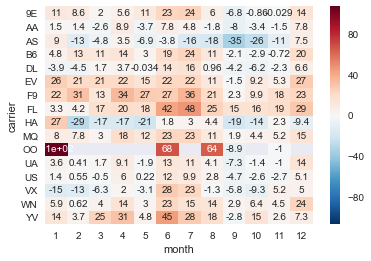

In [26]:
df_pvtble = df.pivot_table(index="carrier", columns="month", values="arr_delay")
sns.heatmap(df_pvtble, annot=True)

In [27]:
na_idx = df.arr_delay.isnull()
fill_NA = np.diag( df_pvtble.loc[df.carrier[na_idx], df.month[na_idx]] )
df.loc[na_idx, "arr_delay"] = fill_NA

### Now dep_time & arr_time can be computed

In [30]:
def add_delay_to_HHMM(HHMM, delay):
    t = (HHMM//100)*60+(HHMM%100) + round(delay)
    t[ t>24*60 ] -= 24*60
    t[ t<0 ] += 24*60
    return (t//60)*100 + t%60

In [31]:
na_idx = df.dep_time.isnull()
df.loc[na_idx, "dep_time"] = add_delay_to_HHMM(df.sched_dep_time, df.dep_delay)[na_idx]

In [32]:
na_idx = df.arr_time.isnull()
df.loc[na_idx, "arr_time"] = add_delay_to_HHMM(df.sched_arr_time, df.arr_delay)[na_idx]

### Hence remaining Air_time can be filled now

In [33]:
air_time_toFILL = HHMM_to_Minutes(df.arr_time) - HHMM_to_Minutes(df.dep_time)
air_time_toFILL.describe()    # -ve found
air_time_toFILL[ air_time_toFILL < 0 ] += 24*60
#air_time_toFILL.describe()    # -ve is removed now

na_idx = df.air_time.isnull()
df.loc[na_idx, "air_time"] = air_time_toFILL[na_idx]

count    336776.000000
mean         91.090443
std         251.961427
min       -1401.000000
25%          90.000000
50%         132.000000
75%         172.000000
max         690.000000
dtype: float64

In [34]:
df.info()     # So, all missing values are filled up now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          336776 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         336776 non-null float64
arr_time          336776 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         336776 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          336776 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


In [21]:
df.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1353.163791,1344.254840,12.726444,1506.439539,1536.380220,7.382168,1971.923620,150.357871,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.045183,467.335756,39.738848,532.600806,497.457142,44.887688,1632.471938,94.795124,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,0.822532,1.000000,-322.000000,1.000000,1.843133,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,910.000000,906.000000,-5.000000,1107.000000,1124.000000,-16.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1407.000000,1359.000000,-1.000000,1540.000000,1556.000000,-4.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1747.000000,1729.000000,12.000000,1943.000000,1945.000000,15.000000,3465.000000,190.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,1438.795210,4983.000000,23.000000,59.000000


In [35]:
# Anomaly found in air_time: As low as just 1.8 min air_time is reported, which cannot be true.
# Should minimum air_time atleast be original-minimum,i.e. 20.
# Around 17 such low air_time values are found

df.loc[df.air_time<20, "air_time"] = 20
df.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1353.169507,1344.254840,12.726444,1506.441697,1536.380220,7.382168,1971.923620,150.358737,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.046615,467.335756,39.738848,532.608255,497.457142,44.887688,1632.471938,94.793874,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,0.000000,1.000000,-322.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,910.000000,906.000000,-5.000000,1107.000000,1124.000000,-16.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1407.000000,1359.000000,-1.000000,1540.000000,1556.000000,-4.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1747.000000,1729.000000,12.000000,1943.000000,1945.000000,15.000000,3465.000000,190.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,1439.000000,4983.000000,23.000000,59.000000


In [36]:
df.to_csv("flight_data_cleaned.csv")